In [6]:

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

In [7]:
#Read the excel file and store the sheets into dataframes.
df = pd.ExcelFile(r"/Users/nana/Desktop/Python Hackathon 2/V02Max_Combined.xlsx")
kay = pd.read_excel(df, sheet_name = 'Kayaking')
ath = pd.read_excel(df, sheet_name = 'Athletes')
tri = pd.read_excel(df, sheet_name = 'Triathlon')
fen = pd.read_excel(df, sheet_name = 'Fencing')


## Qn1:Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [26]:
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
print(sportdf)

Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]


## Qn49:Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [9]:
#RR interval and inter-beat interval (IBI) are both measurements of time between heartbeats,IBI is essentially the same as the RR interval.

#Group by ID and sort RR values ascending,Then take the first value of RR using first()
a=fen.sort_values('RR').groupby('ID')['RR'].first().reset_index()

#Rename the RR column to IBI
a.rename(columns={'RR':'IBI'},inplace='True')

#Print ID and Minimun IBI value
print("Minimum IBI values for Fencing athletes:")
print(a)

Minimum IBI values for Fencing athletes:
   ID  IBI
0   1  304
1   2  304
2   3  328
3   4  268
4   5  316
5   6  296
6   7  252
7   8  300
8   9  300
9  10  312


## Qn50:Create a violin chart using any 2 columns in the dataset

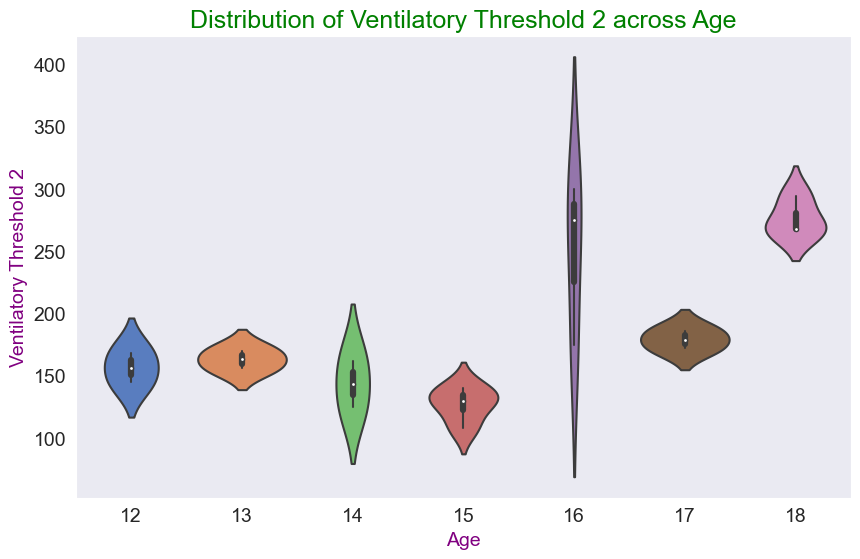

In [10]:
# Set the style of the plot
sns.set_style("dark" ,{"grid.color": ".6", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(10, 6)) 

# Assigning x axis with age and y axis with ventilatory threshold 2
# Sort the athletes data by age in ascending order
sns.violinplot(x=ath.sort_values(by='age')['age'], y=ath['P_vt2'],palette="muted")

# Assigning title and labels
plt.title('Distribution of Ventilatory Threshold 2 across Age', fontsize=18, color ='green')
plt.xlabel('Age', fontsize=14, color='purple');
plt.ylabel('Ventilatory Threshold 2', fontsize=14, color='purple');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);



## Qn51:List every athlete’s V02 ml/kg

## Qn52:Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

## Qn53:phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [11]:
#create phonebook dictionary with names and numbers
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781} 

#retrive jill's phone number using get()
a=phonebook.get("Jill")

#print jills's phone number
print("Jill phone number:",a)

Jill phone number: 947662781


## Qn54:Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID


## Qn55:Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate


In [12]:
#Load triathlon and athlete details into dataframe
df2=pd.DataFrame(tri)
df1=pd.DataFrame(ath)

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
df2['HR']=60/(df2['RR']/1000)
High_HR=0

#Used for loop to iterate through rows to find the highest HR
for i,r in df2.iterrows():
 if r['HR']>High_HR:
    High_HR=r['HR']
    a=r['ID']
     
#Print athlete ID with highest HR
print("Athlete ID:",int(a),"has the highest heart rate:",High_HR)

#Used .loc to get the details of athelte with highest HR from athletes,triathlon dataframe
details1=df1.loc[df1['ID']==a]
details2=df2.loc[df2['HR']==High_HR]

#Merged details from both dataframe using merge
details=details1.merge(details2,on='ID')

#print athlete details
print("Athlete details:")
details

Athlete ID: 18 has the highest heart rate: 197.3684210526316
Athlete details:


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,time,RR,VO2,power,HR
0,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,628.644,304.0,1.909147,170,197.368421


## Qn56:Display a histogram to show distribution of athletes by sport.

Count of Athletes By Sport:
        sport  count
0    fencing     10
1      kayak      6
2  triathlon      2


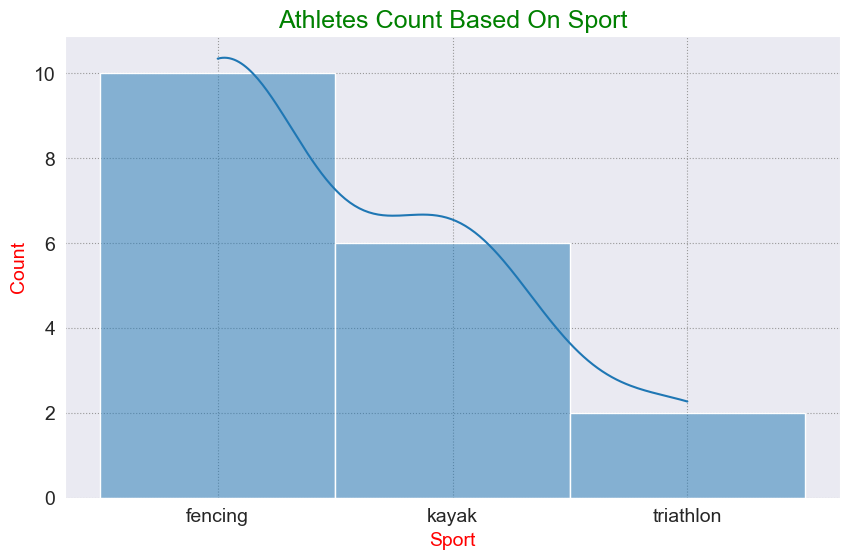

In [13]:
#Count of Athletes By Sport
print("Count of Athletes By Sport:\n",ath['sport'].value_counts().reset_index())

# Set the style of the plot
sns.set_style("darkgrid" ,{"grid.color": ".6", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(10, 6)) 

# Assigning x axis with sport 
sns.histplot(x='sport',data=ath,kde=True)

# Assigning title and labels
plt.title('Athletes Count Based On Sport', fontsize=18, color ='green')
plt.xlabel('Sport', fontsize=14, color='red');
plt.ylabel('Count', fontsize=14, color='red');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()

## Qn57:get the first letter of last name of students using for loops and RegEX

In [14]:
#Used for loop to iterate through athletes table rows 
for i,r in ath.iterrows():
    lastname=r['Last Name']
    
#used Regex findall function to find the first letter of last name
    FirstLetter=re.findall(r'\b\w',lastname)
    
#print first letter of last name
    print("Last Name:",lastname,", First Letter:",FirstLetter[0])

Last Name: Martinez , First Letter: M
Last Name: Reynolds , First Letter: R
Last Name: Harper , First Letter: H
Last Name: Sanchez , First Letter: S
Last Name: Thompson , First Letter: T
Last Name: Rodriguez , First Letter: R
Last Name: Simmons , First Letter: S
Last Name: Bennett , First Letter: B
Last Name: Price , First Letter: P
Last Name: Jordan , First Letter: J
Last Name: Griffin , First Letter: G
Last Name: Dixon , First Letter: D
Last Name: Carpenter , First Letter: C
Last Name: Mitchell , First Letter: M
Last Name: Wallace , First Letter: W
Last Name: Anderson , First Letter: A
Last Name: Foster , First Letter: F
Last Name: Myers , First Letter: M


## Qn58:What is the average % difference in heart rate between warm up and GET for all athletes?

## Qn59:Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

## Qn60:get the last letter of athletes last names using RegEX


In [15]:
#Used for loop to iterate through athletes table rows 
for i,r in ath.iterrows():
    lastname=r['Last Name']
    
#used Regex findall function to find the last letter of last name
    LastLetter=re.findall(r'\w$',lastname)
    
#print last letter of last name
    print("Last Name:",lastname,", Last Letter:",LastLetter[0])

Last Name: Martinez , Last Letter: z
Last Name: Reynolds , Last Letter: s
Last Name: Harper , Last Letter: r
Last Name: Sanchez , Last Letter: z
Last Name: Thompson , Last Letter: n
Last Name: Rodriguez , Last Letter: z
Last Name: Simmons , Last Letter: s
Last Name: Bennett , Last Letter: t
Last Name: Price , Last Letter: e
Last Name: Jordan , Last Letter: n
Last Name: Griffin , Last Letter: n
Last Name: Dixon , Last Letter: n
Last Name: Carpenter , Last Letter: r
Last Name: Mitchell , Last Letter: l
Last Name: Wallace , Last Letter: e
Last Name: Anderson , Last Letter: n
Last Name: Foster , Last Letter: r
Last Name: Myers , Last Letter: s


## Qn61:Reverse an arrays order in Python. You can use any array with any values you like.

In [16]:
#Creating a numpy array
x=np.array([11,22,32,41])

#Reverse array
Reversed=x[::-1]

#print reversed array
print(Reversed)

[41 32 22 11]


## Qn62:What is the root mean of successive differences for 30 consecutive minutes for each athlete.

## Qn63:On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [19]:
#Load fencing and athlete details into dataframe
Zn=pd.DataFrame(fen)
Zn1=pd.DataFrame(ath)

#merge dateframes on ID to include age column 
det1=Zn.merge(Zn1[['ID','age']],on='ID')

#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
det1['time']=det1['time']/60
det1['HR']=60/(df2['RR']/1000)
det1['MaxHR']=220-det1['age']

#Define HR zone boundries for Zone 5 which is MaxHR=90-100%
zonemin=0.90*det1['MaxHR']
zonemax=1.00*det1['MaxHR']
det1['Zone']='Other Zones'
det1.loc[(det1['HR']>=zonemin)&(det1['HR']<=zonemax),'Zone']='Zone 5'
det1.loc[(det1['HR'].isnull()),'Zone']='NA'
de=det1.loc[(det1['Zone']=='Zone 5')]
print(de)

#Calculate Average time for each athlete where Zone=Zone 5
Time=det1.loc[(det1['Zone']=='Zone 5')].groupby('ID')['time'].mean().reset_index()
print("Time Spent By Each athlete from Fencing Sport in Zone 5:")

#Rename time column to Average Time
Time.columns=['ID','Avg Time(Min) in Zone 5'] 

#Print Average Time
print(Time)

      ID      time    RR       VO2  power  age          HR  MaxHR    Zone
1466   1  8.675467   320  1.445280    140   15  189.873418    205  Zone 5
1537   1  9.057000   320  1.377463    140   15  187.500000    205  Zone 5
1552   1  9.137067   324  1.405577    140   15  185.185185    205  Zone 5
1555   1  9.152933   320  1.375525    140   15  185.185185    205  Zone 5
1561   1  9.184867   320  1.446141    140   15  185.185185    205  Zone 5
...   ..       ...   ...       ...    ...  ...         ...    ...     ...
4527   3 -1.324000   864  0.529731      0   16  185.185185    204  Zone 5
4528   3 -1.310867   788  0.529731      0   16  187.500000    204  Zone 5
4529   3 -1.297000   832  0.529731      0   16  185.185185    204  Zone 5
4531   3 -1.265000   964  0.477317      0   16  185.185185    204  Zone 5
4536   3 -1.189667  1076  0.464050      0   16  185.185185    204  Zone 5

[328 rows x 9 columns]
Time Spent By Each athlete from Fencing Sport in Zone 5:
   ID  Avg Time(Min) in Zone 5


## Qn64:Count athletes based on Gender using count plot

Count of Athletes By Gender:
    Gender  count
0  Female     10
1    Male      8


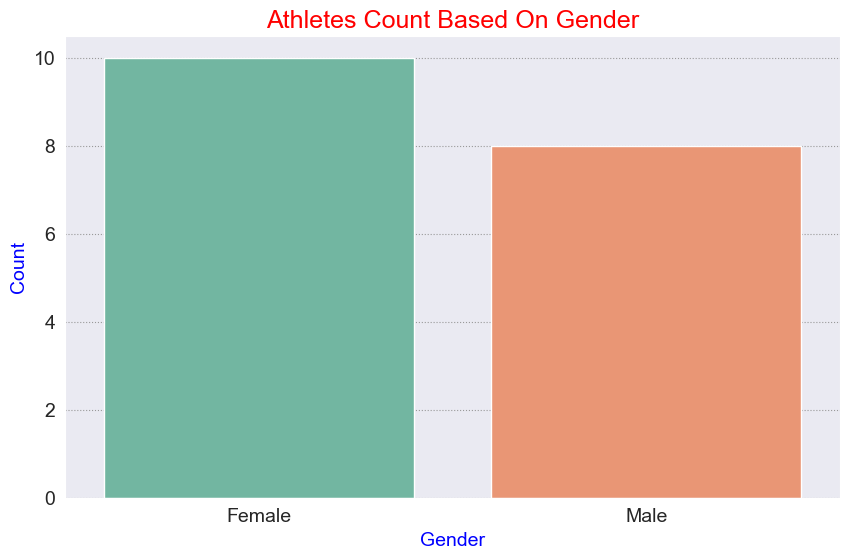

In [18]:
#Count of Gender
print("Count of Athletes By Gender:\n",ath['Gender'].value_counts().reset_index())

# Set the style of the plot
sns.set_style("darkgrid" ,{"grid.color": ".6", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(10, 6)) 

#Assigning colors for bars
palette = {"Male": "Red", "Female": "Green"}

# Assigning x axis with gender 
sns.countplot(x='Gender',data=ath,palette='Set2')

# Assigning title and labels
plt.title('Athletes Count Based On Gender', fontsize=18, color ='Red')
plt.xlabel('Gender', fontsize=14, color='blue');
plt.ylabel('Count', fontsize=14, color='blue');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()